# PyTorch Beginner Tutorials

## Tutorial 1:

In [1]:
from __future__ import print_function

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

print("PyTorch version is:", torch.__version__)

if(torch.cuda.is_available()): print("GPU is available")

PyTorch version is: 0.4.0
GPU is available


In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[ 8.9004e+05,  4.5710e-41,  1.1290e-37],
        [ 0.0000e+00,  7.8473e-44,  1.4013e-45],
        [ 1.4013e-45,  1.4013e-45,  1.2667e-37],
        [ 0.0000e+00,  1.3270e-37,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.3124e-37]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[ 0.5713,  0.0187,  0.7058],
        [ 0.8331,  0.5522,  0.3619],
        [ 0.8246,  0.3166,  0.0565],
        [ 0.3298,  0.4157,  0.8049],
        [ 0.5406,  0.7848,  0.4837]])


In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])


In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([ 5.5000,  3.0000])


In [6]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)
tensor([[ 1.7943,  0.4005, -0.5396],
        [-0.4894, -1.9983, -1.2500],
        [ 0.1810,  1.0417, -0.1680],
        [ 0.3602, -2.0665,  0.9540],
        [ 1.1980, -0.4148, -0.1376]])


In [7]:
print(x.size())

torch.Size([5, 3])


In [8]:
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))

tensor([[ 2.1273,  0.5801,  0.0710],
        [-0.2106, -1.2782, -1.1722],
        [ 0.5672,  1.8218,  0.7957],
        [ 1.1195, -1.2017,  1.8009],
        [ 1.9874,  0.2671,  0.1191]])
tensor([[ 2.1273,  0.5801,  0.0710],
        [-0.2106, -1.2782, -1.1722],
        [ 0.5672,  1.8218,  0.7957],
        [ 1.1195, -1.2017,  1.8009],
        [ 1.9874,  0.2671,  0.1191]])


In [9]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 2.1273,  0.5801,  0.0710],
        [-0.2106, -1.2782, -1.1722],
        [ 0.5672,  1.8218,  0.7957],
        [ 1.1195, -1.2017,  1.8009],
        [ 1.9874,  0.2671,  0.1191]])


In [10]:
y.add_(x)
print(y)

tensor([[ 2.1273,  0.5801,  0.0710],
        [-0.2106, -1.2782, -1.1722],
        [ 0.5672,  1.8218,  0.7957],
        [ 1.1195, -1.2017,  1.8009],
        [ 1.9874,  0.2671,  0.1191]])


In [11]:
print(x)
print(x[:, 1])

tensor([[ 1.7943,  0.4005, -0.5396],
        [-0.4894, -1.9983, -1.2500],
        [ 0.1810,  1.0417, -0.1680],
        [ 0.3602, -2.0665,  0.9540],
        [ 1.1980, -0.4148, -0.1376]])
tensor([ 0.4005, -1.9983,  1.0417, -2.0665, -0.4148])


In [12]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.8478])
-0.8477573990821838


In [14]:
a = torch.ones(5)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.])


In [15]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [16]:
a.add_(1)
print(a)
print(b)

tensor([ 2.,  2.,  2.,  2.,  2.])
[2. 2. 2. 2. 2.]


In [17]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)


In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([ 0.1522], device='cuda:0')
tensor([ 0.1522], dtype=torch.float64)


## Tutorial 2:

In [19]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [20]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [21]:
print(y.grad_fn)

In [22]:
z = y*y*3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


In [23]:
a = torch.randn(2, 2)
a = ((a*3) / (a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [24]:
out.backward()

In [25]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


In [26]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([  456.3846,  -549.1602, -1739.3926])


In [27]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([  204.8000,  2048.0000,     0.2048])


In [28]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


## Tutorial 3:

In [29]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [31]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0878,  0.1353, -0.0211, -0.0044, -0.1220, -0.0389,  0.0783,
          0.0251, -0.0385,  0.0317]])


In [32]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [33]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5964)


In [34]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [35]:
net.zero_grad()

print('conv1.bias.grad before backward:')
print(net.conv1.bias.grad)

loss.backward()

print('\nconv1.bias.grad after backward:')
print(net.conv1.bias.grad)

conv1.bias.grad before backward:
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])

conv1.bias.grad after backward:
tensor(1.00000e-02 *
       [ 1.0413, -1.3785,  0.3146, -0.9736,  0.0052,  0.9503])


In [36]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [37]:
import torch.optim as optim


# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Tutorial 4:

In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


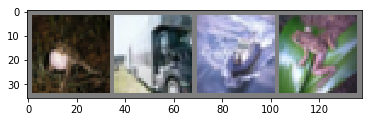

 frog truck  ship  frog


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
import time

start_time = time.clock()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

end_time = time.clock()

print('Finished Training. Training time was:', end_time - start_time, 'seconds')

[1,  2000] loss: 2.225
[1,  4000] loss: 1.870
[1,  6000] loss: 1.696
[1,  8000] loss: 1.588
[1, 10000] loss: 1.527
[1, 12000] loss: 1.478
[2,  2000] loss: 1.414
[2,  4000] loss: 1.403
[2,  6000] loss: 1.346
[2,  8000] loss: 1.354
[2, 10000] loss: 1.302
[2, 12000] loss: 1.313
Finished Training. Training time was: 479.12170799999996 seconds


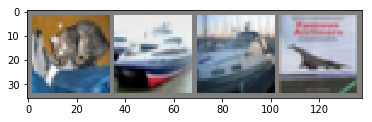

GroundTruth:    cat  ship  ship plane


In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [44]:
outputs = net(images)

In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [46]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [47]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 51 %
Accuracy of   car : 64 %
Accuracy of  bird : 49 %
Accuracy of   cat : 38 %
Accuracy of  deer : 50 %
Accuracy of   dog : 48 %
Accuracy of  frog : 62 %
Accuracy of horse : 63 %
Accuracy of  ship : 71 %
Accuracy of truck : 64 %


In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [49]:
net = net.cuda()

In [ ]:
inputs, labels = inputs.to(device), labels.to(device)

criterion = criterion.to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
start_time = time.clock()

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

end_time = time.clock()

print('Finished Training. Training time was:', end_time - start_time, 'seconds')

[1,  2000] loss: 1.348
[1,  4000] loss: 1.288
[1,  6000] loss: 1.309
[1,  8000] loss: 1.277
[1, 10000] loss: 1.217
[1, 12000] loss: 1.238
[2,  2000] loss: 1.151
[2,  4000] loss: 1.153
[2,  6000] loss: 1.170
[2,  8000] loss: 1.165
[2, 10000] loss: 1.140
[2, 12000] loss: 1.168
[3,  2000] loss: 1.035
[3,  4000] loss: 1.080
[3,  6000] loss: 1.070
[3,  8000] loss: 1.089
[3, 10000] loss: 1.083
[3, 12000] loss: 1.080
[4,  2000] loss: 0.977
[4,  4000] loss: 0.981
[4,  6000] loss: 1.003
[4,  8000] loss: 1.021
[4, 10000] loss: 1.024
[4, 12000] loss: 1.042
[5,  2000] loss: 0.922
[5,  4000] loss: 0.934
[5,  6000] loss: 0.936


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))